# 데이터 시각화 basic

## 데이터 시각화 툴

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# 그래프 설정
import matplotlib.pyplot as plt
# font 설정
plt.rc('font', family='AppleGothic')
# 마이너스 폰트 설정
plt.rc('axes', unicode_minus=False)
# retina display를 사용한다면 그래프를 좀 더 선명하게 하는 옵션
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
# 가능한 그래프 스타일, 여기서는 일단 ggplot을 사용해보자
plt.style.use('ggplot')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
df = pd.read_csv('krx.csv')
df.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,7306,7306,7306,2423,2404,2423,2423,2423,2247,2423
unique,7306,3,7306,158,2252,1786,9,2309,2226,22
top,57FT12,KOSPI,KBG132엘지전자풋,특수 목적용 기계 제조업,기업인수합병,1976-06-30,12월,-,http://www.dw.co.kr,서울특별시
freq,1,5660,1,144,37,8,2362,5,2,977


# 빈도수와 시각화
## 변수 한개 빈도수
### Market 의 빈도수

In [5]:
# Series.value_counts() - 시리즈 값의 빈도수
df["Market"].value_counts()

KOSPI     5660
KOSDAQ    1507
KONEX      139
Name: Market, dtype: int64

<AxesSubplot:>

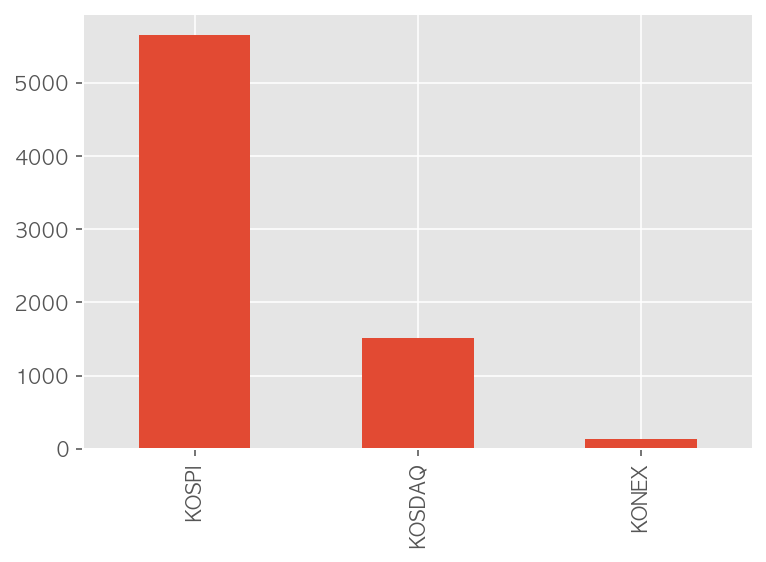

In [6]:
# pandas.dataframe.plot()
# 기본값은 선그래프
df["Market"].value_counts().plot(kind="bar")

<AxesSubplot:>

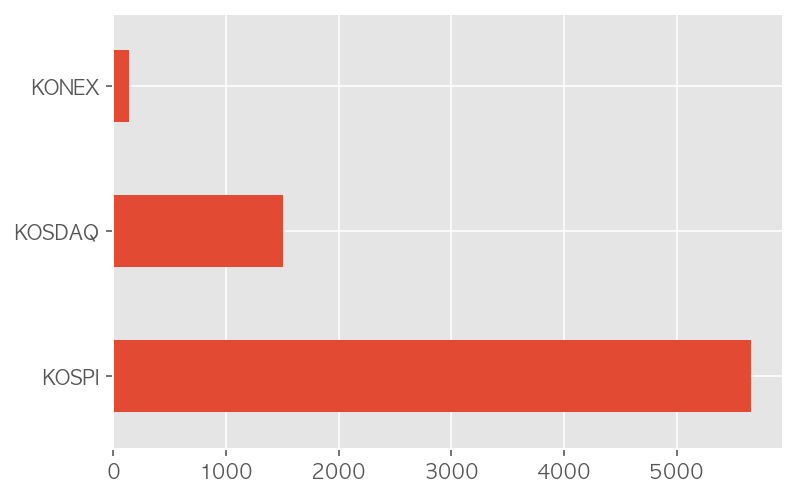

In [7]:
# 이렇게도 그릴 수 있음
df["Market"].value_counts().plot.barh()

<AxesSubplot:xlabel='Market', ylabel='count'>

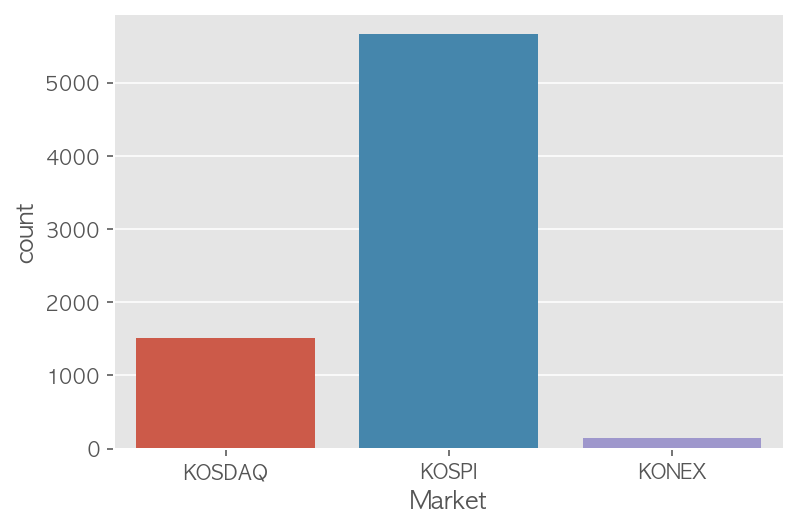

In [8]:
# seaborn을 이용한 결과
# 전체 df에서 전달한 축 인자에 따라 빈도수를 계산해준다.
sns.countplot(data=df, x="Market")

### Sector의 빈도수

In [9]:
# 빈도 수 상위 20개 섹터
sector_count_top = df["Sector"].value_counts().head(20).sort_values()
sector_count_top

전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업     34
컴퓨터 프로그래밍, 시스템 통합 및 관리업               35
기초 의약물질 및 생물학적 제제 제조업                 38
기타 전문 도매업                             42
일반 목적용 기계 제조업                         43
기초 화학물질 제조업                           43
플라스틱제품 제조업                            43
의료용 기기 제조업                            50
자연과학 및 공학 연구개발업                       54
1차 철강 제조업                             57
반도체 제조업                               57
통신 및 방송 장비 제조업                        72
금융 지원 서비스업                            72
기타 화학제품 제조업                           91
기타 금융업                                93
의약품 제조업                               93
자동차 신품 부품 제조업                         97
전자부품 제조업                             122
소프트웨어 개발 및 공급업                       139
특수 목적용 기계 제조업                        144
Name: Sector, dtype: int64

<AxesSubplot:title={'center':'sector'}>

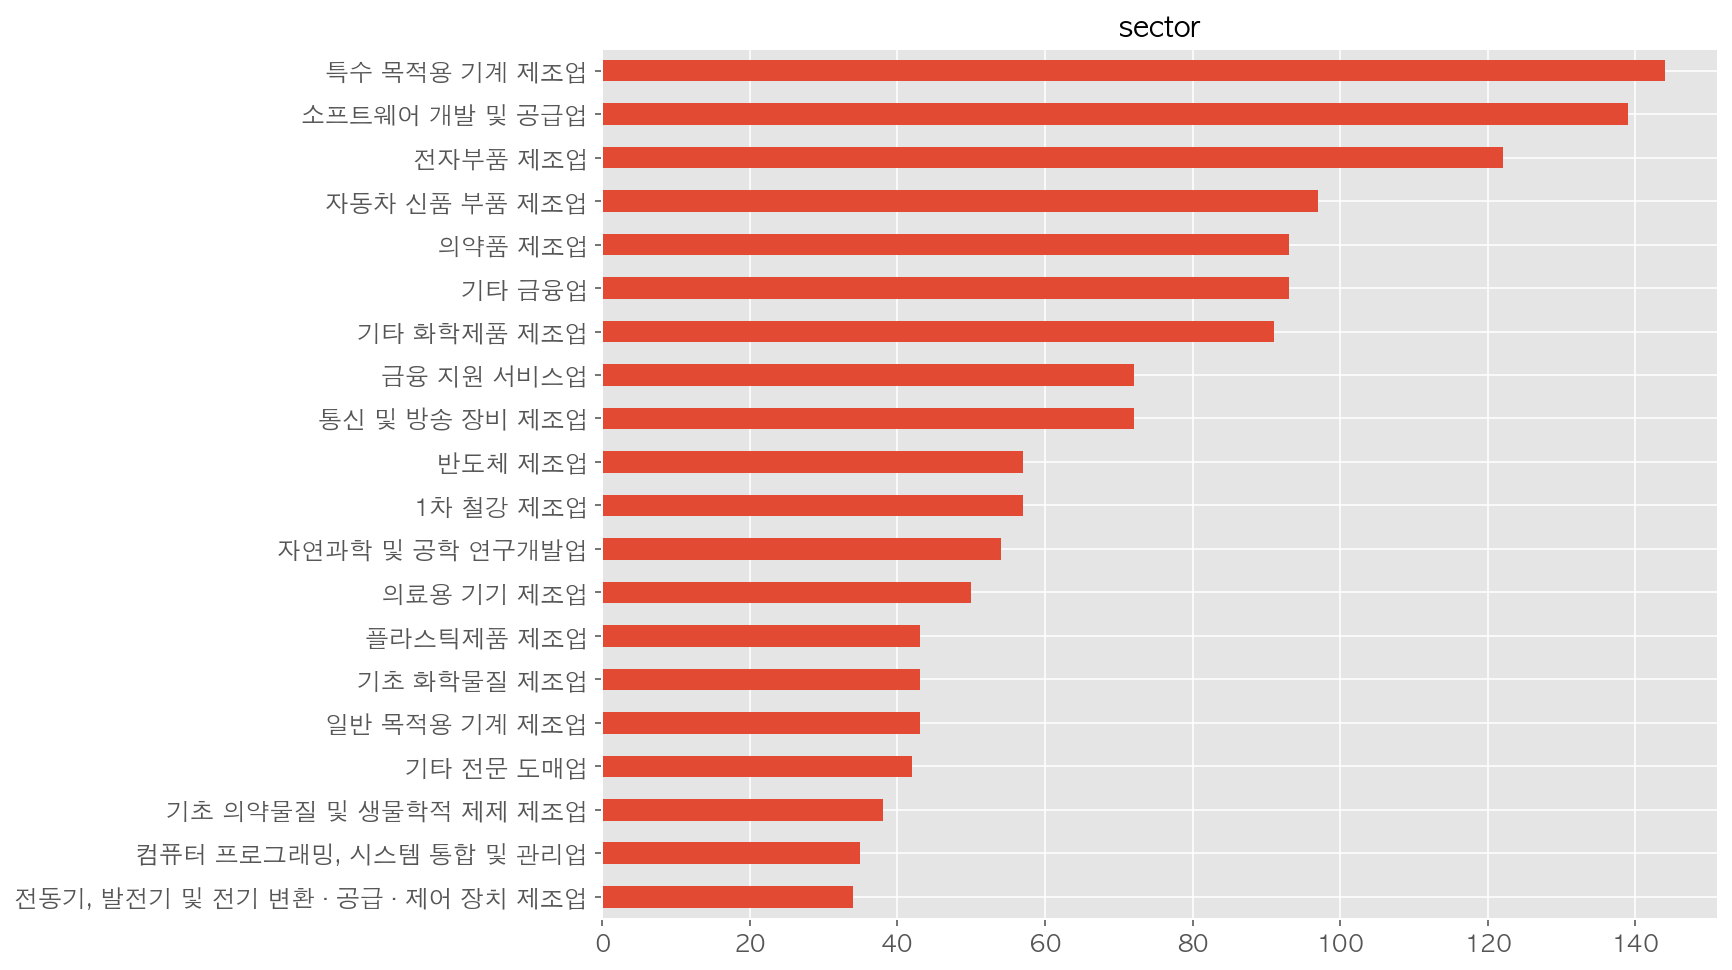

In [87]:
# pandas.plot으로 그리면 다음과 같다
sector_count_top.plot.barh(title="sector", figsize=(10,8), fontsize=12)

In [91]:
# boolean indexing으로 상위 섹터 기업만 골라오기
# .isin(values) - element가 values 안에 포함되면 True, 아니면 False
index = sector_count_top.sort_values(ascending=False).index
df_top_sector = df[df["Sector"].isin(index)]
df_top_sector

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
7294,145020,KOSDAQ,휴젤,기초 의약물질 및 생물학적 제제 제조업,"보툴리눔톡신, 필러",2015-12-24,12월,손지훈,http://www.hugel.co.kr,강원도,2015.0
7295,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시,2002.0
7296,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시,1994.0
7297,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


<AxesSubplot:xlabel='count', ylabel='Sector'>

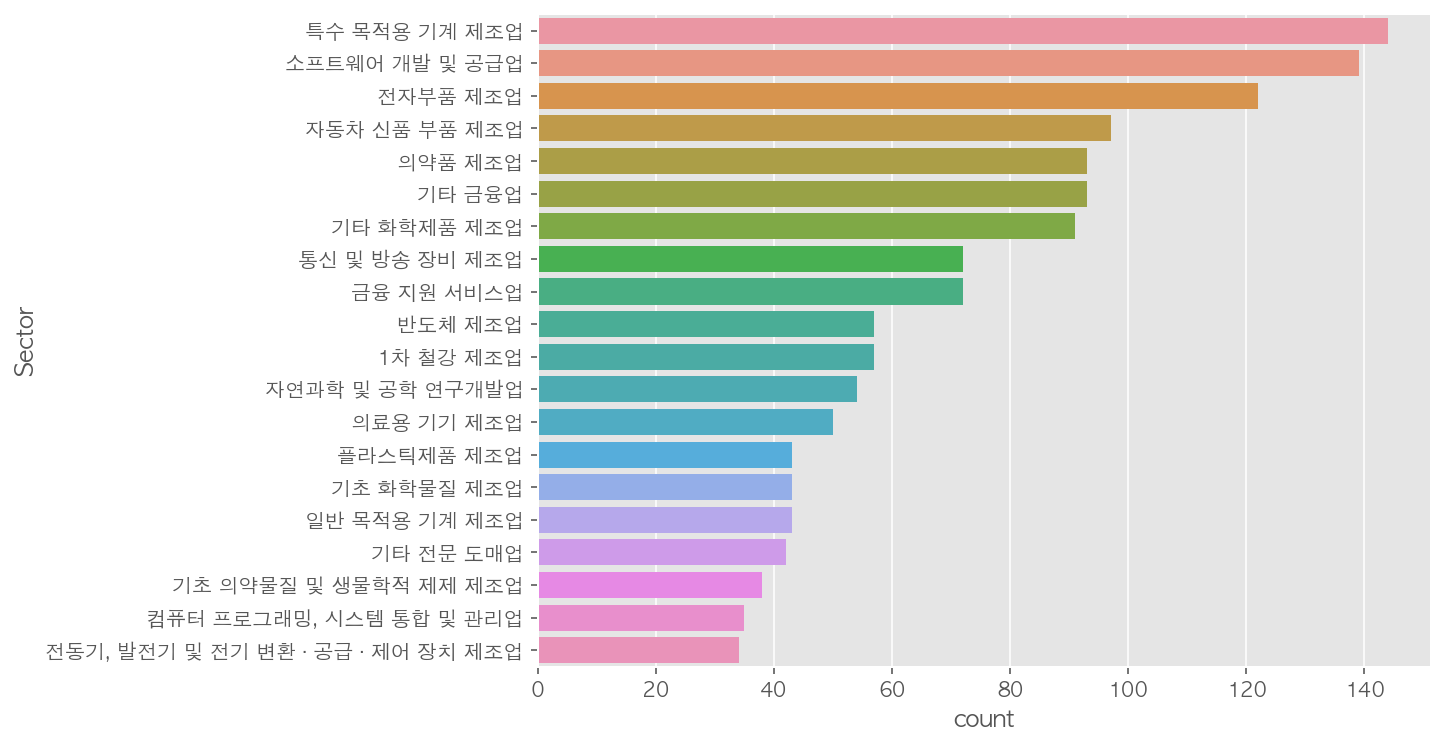

In [94]:
# seaborn으로 그래프 그리기
plt.figure(figsize=(8,6))
sns.countplot(data=df_top_sector, y="Sector", order=index)

In [13]:
# 빈도수 1위 섹터 기업
df[df["Sector"] == index[0]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
81,068790,KOSDAQ,DMS,특수 목적용 기계 제조업,LCD 제조장비,2004-10-01,12월,박용석,http://www.dms21.co.kr,경기도
101,083450,KOSDAQ,GST,특수 목적용 기계 제조업,"GasScrubber,Chiller",2006-02-01,12월,김덕준,http://www.gst-in.com,경기도
125,078150,KOSDAQ,HB테크놀러지,특수 목적용 기계 제조업,TFT-LCD검사장비,2004-12-08,12월,문성준,http://www.ncbnet.co.kr,충청남도
...,...,...,...,...,...,...,...,...,...,...
7265,010660,KOSPI,화천기계,특수 목적용 기계 제조업,"선반,밀링,연삭기,CNC선반,CNC밀링,머시닝센타 제조,판매/자동차부품(실린더블럭) 제조",1988-12-12,12월,"권영열, 권형석",http://www.hwacheon.co.kr,서울특별시
7266,000850,KOSPI,화천기공,특수 목적용 기계 제조업,"CNC선반,CNC밀링,연마기(금속공작기계),MC공작기계,COPY밀링기계,주방품 제조,도매",1999-11-18,12월,"각자대표이사 권영두, 권영렬",http://www.hwacheon.com,광주광역시
7282,090710,KOSDAQ,휴림로봇,특수 목적용 기계 제조업,제조업용로봇및서비스로봇,2006-12-05,12월,정광원,http://www.dstrobot.com,충청남도
7297,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도


### Industry의 빈도수

In [14]:
industry_count_top = df['Industry'].value_counts().head(20).sort_values()
industry_count_top

생명보험           2
디지털셋톱박스        2
증권업            3
금융지주회사         3
도급공사           3
-              3
의약품            3
건강기능식품         3
금융지원 서비스       3
금융지원서비스        3
자동차부품          3
셋톱박스           3
벤처캐피탈          4
기업인수 및 합병      6
기업 인수 및 합병     7
모바일게임          7
화장품            7
지주사업           9
지주회사          19
기업인수합병        37
Name: Industry, dtype: int64

<AxesSubplot:title={'center':'industry'}>

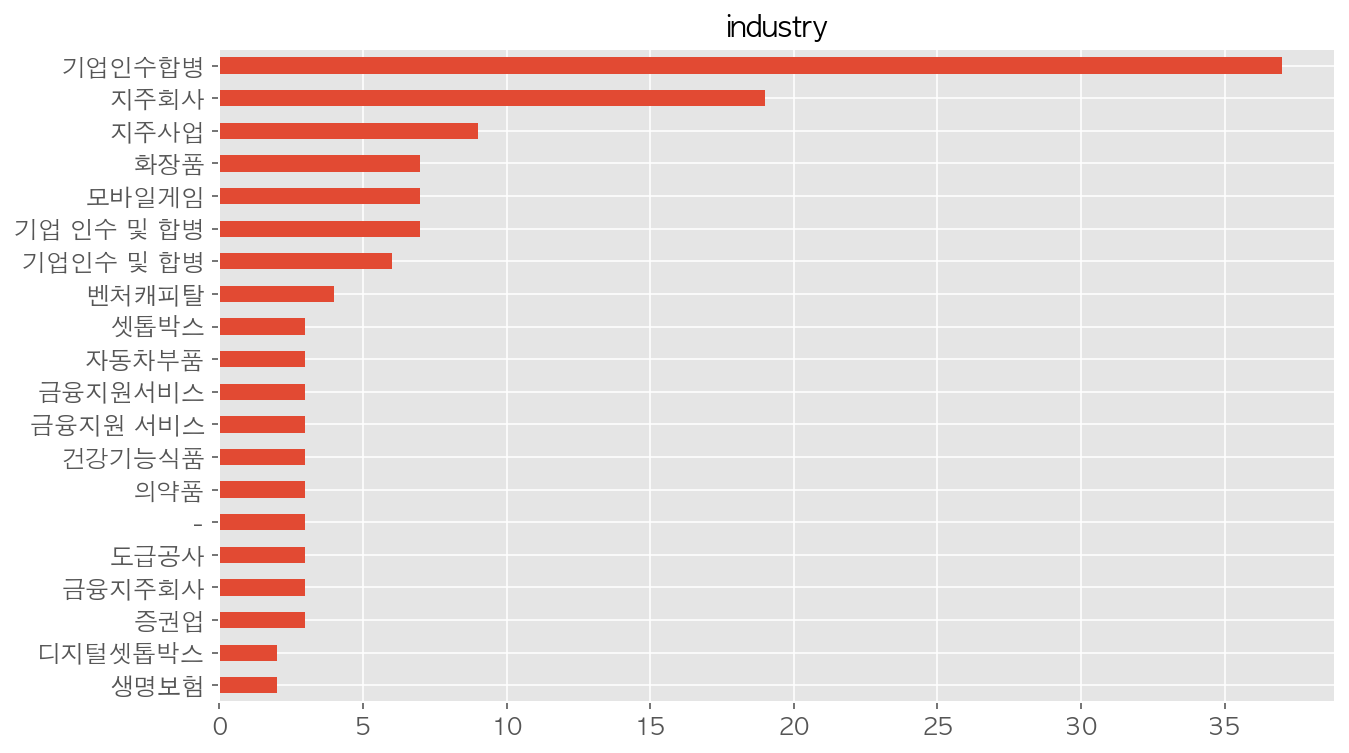

In [97]:
industry_count_top.plot.barh(title='industry', figsize=(10,6), fontsize=12)

<AxesSubplot:xlabel='count', ylabel='Industry'>

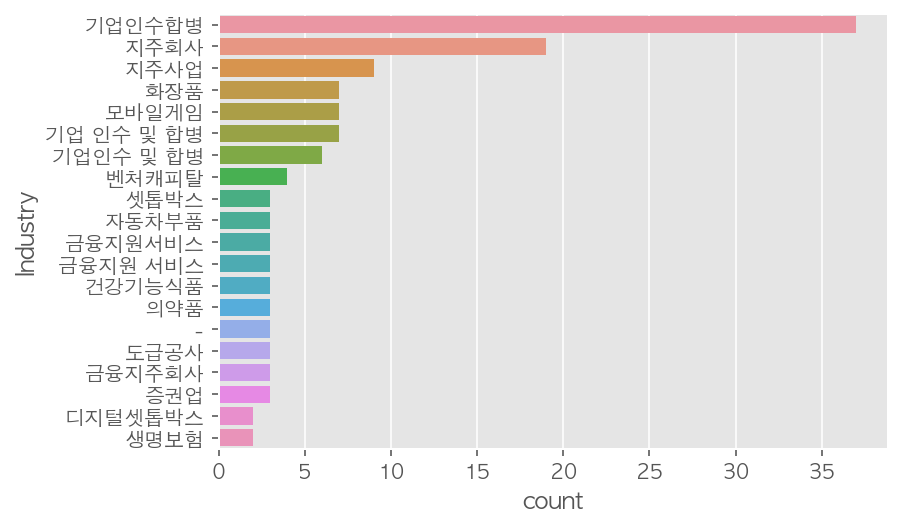

In [98]:
index = industry_count_top.sort_values(ascending=False).index
df_industry_top = df[df['Industry'].isin(index)]
sns.countplot(data=df_industry_top, y='Industry', order=index)

In [17]:
df.sort_values(by='Region')

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5018,214450,KOSDAQ,파마리서치프로덕트,생활용품 도매업,재생의약품,2015-07-24,12월,각자대표이사 강기석 각자대표이사 김신규,http://pr-products.co.kr,강원도
4544,270020,KONEX,이십일스토어,기타 비금속 광물제품 제조업,"규석, 골재, 석재(조경석)",2017-09-08,12월,강두원,http://www.21stone.co.kr,강원도
3665,009300,KOSDAQ,삼아제약,의약품 제조업,"노마에프, 아토크건조시럽, 코데날정, 코코시럽, 스마엘",2000-07-19,12월,"허 준, 허미애 (각자 대표이사)",http://www.samapharm.co.kr,강원도
2468,067080,KOSDAQ,대화제약,의약품 제조업,"후로스판, 세파메칠 등",2003-02-14,12월,"노병태, 김은석(각자대표)",http://www.dhpharm.co.kr,강원도
2224,043650,KOSDAQ,국순당,알코올음료 제조업,탁주 및 약주,2000-08-24,12월,배상민,http://www.ksdb.co.kr,강원도
...,...,...,...,...,...,...,...,...,...,...
7239,005385,KOSPI,현대차우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7253,008775,KOSPI,호텔신라우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7298,215620,KOSPI,흥국 S&P코리아로우볼,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7301,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 변수 두개에 대한 빈도수

### pandas .crosstab(), pandas.plot()

* 지역별 상장 종목 빈도수 구하기

In [18]:
# pd.crosstab(index, columns)
df_m_r = pd.crosstab(df["Market"], df["Region"])
df_m_r

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,36,0,6,6,1,7,0,1,53,...,0,4,0,3,1,1,3,9,0,0
KOSDAQ,16,495,49,39,9,34,39,5,39,516,...,10,57,3,13,15,2,63,59,4,9
KOSPI,4,146,40,19,9,21,8,0,37,408,...,16,25,0,7,11,7,26,14,1,0


<AxesSubplot:ylabel='Region'>

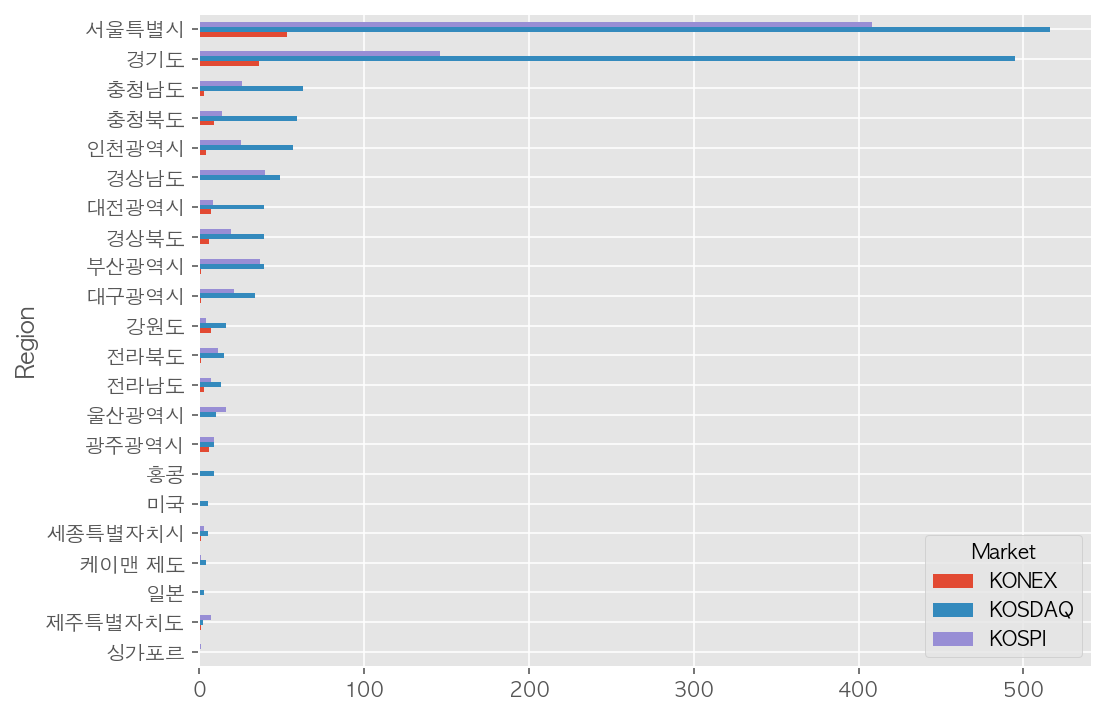

In [100]:
# df.T는 transpose한 df를 리턴해준다
# kosdaq을 기준으로 sort
df_m_r.T.sort_values(by="KOSDAQ").plot.barh(figsize=(8,6))

* 연도별 종목 상장

In [20]:
# ListingDate 행에서 연도만 떼서 새로운 행 생성
# NaN은 기본type이 float라서 NaN을 가진 행의 타입이 float가 된다
# df.astype({col:type})으로 타입 변환
df["ListingYear"] = pd.to_datetime(df["ListingDate"]).dt.year
df = df.dropna(subset=["ListingYear"])
df.astype({"ListingYear" : 'int64'})
df["ListingYear"].head(5)

0    2002.0
1    2015.0
2    1999.0
3    2001.0
4    2017.0
Name: ListingYear, dtype: float64

In [21]:
# pd.crosstab()으로 시장별 연도별 종목 빈도수 세기
df_m_y = pd.crosstab(df["Market"], df["ListingYear"])
df_m_y

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,12,13,27,26,19,14,16,12,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,20,35,59,90,65,68,89,97,86,15
KOSPI,5,1,1,1,6,5,4,1,3,22,...,14,11,9,18,18,20,19,15,14,3


<AxesSubplot:xlabel='ListingYear'>

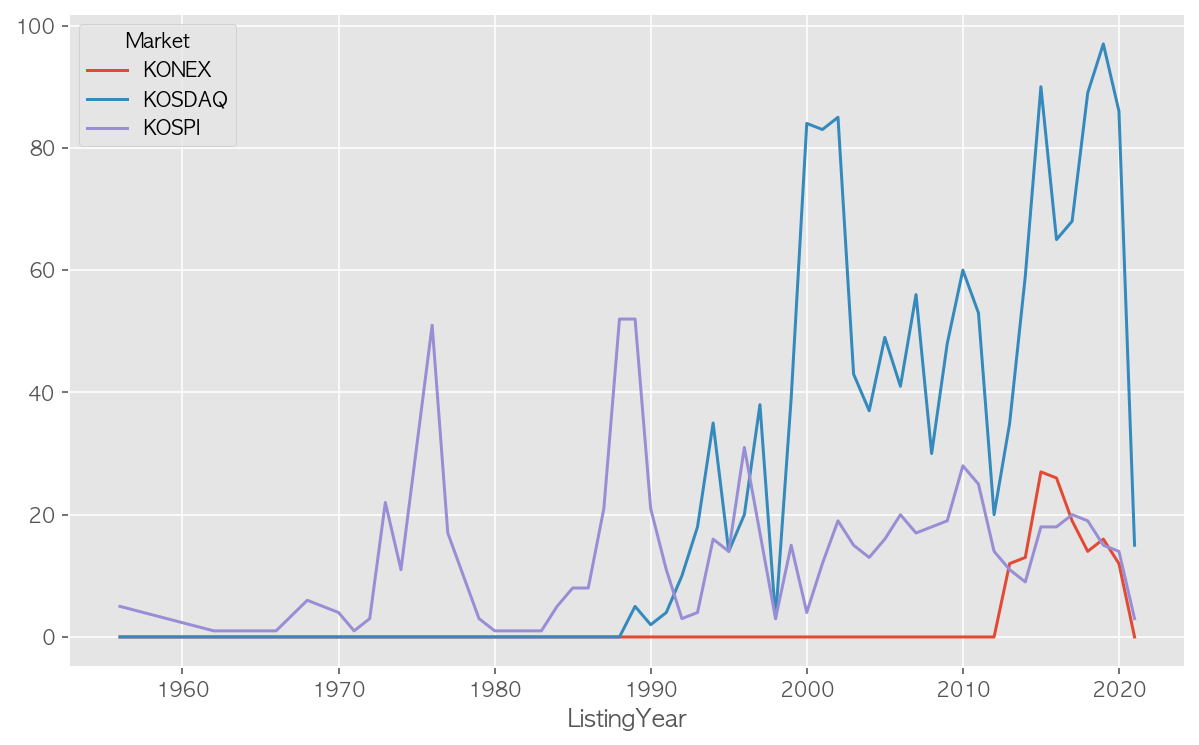

In [101]:
df_m_y.T.plot(figsize=(10, 6))

array([<AxesSubplot:xlabel='ListingYear'>,
       <AxesSubplot:xlabel='ListingYear'>,
       <AxesSubplot:xlabel='ListingYear'>], dtype=object)

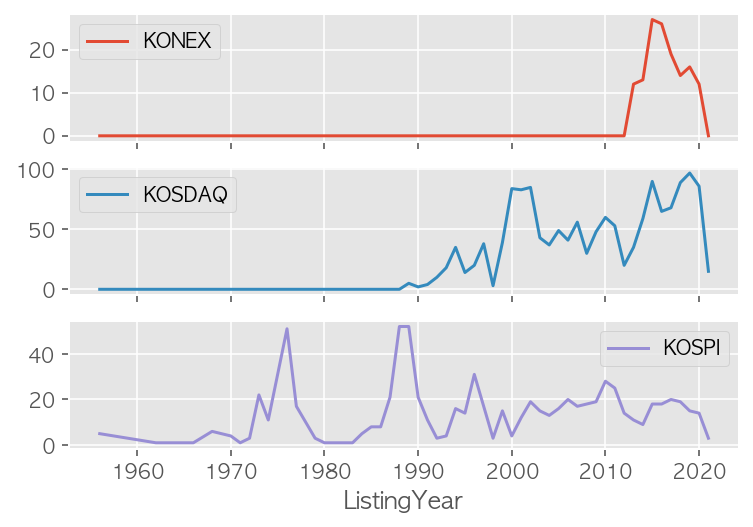

In [23]:
# df.plot(subplots=True) 옵션을 주면 그래프를 따로 그려준다
df_m_y.T.plot(subplots=True)

<AxesSubplot:xlabel='ListingYear'>

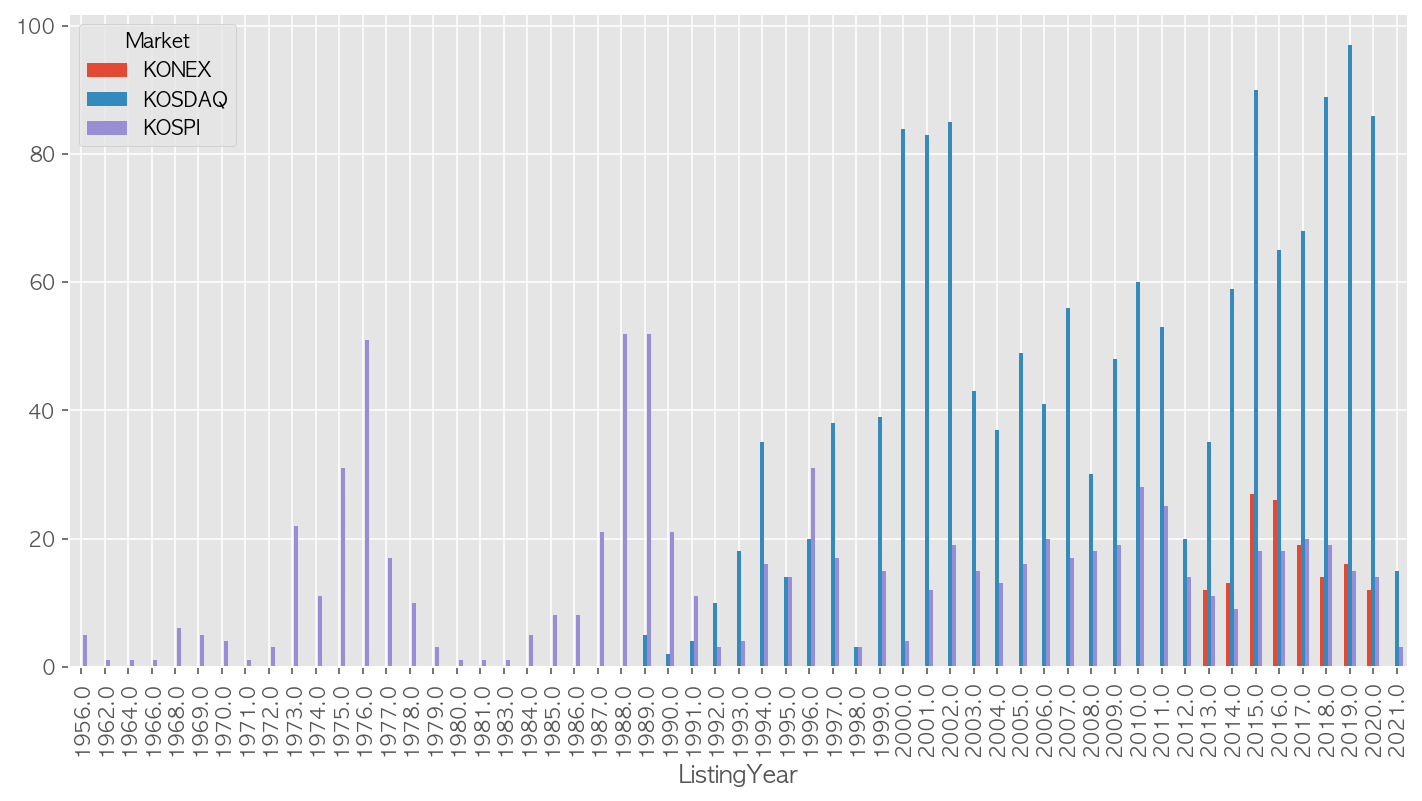

In [103]:
# 이번엔 막대그래프
df_m_y.T.plot.bar(figsize=(12,6))

### seaborn.countplot

* 지역별 종목 상장 빈도수

<AxesSubplot:xlabel='count', ylabel='Region'>

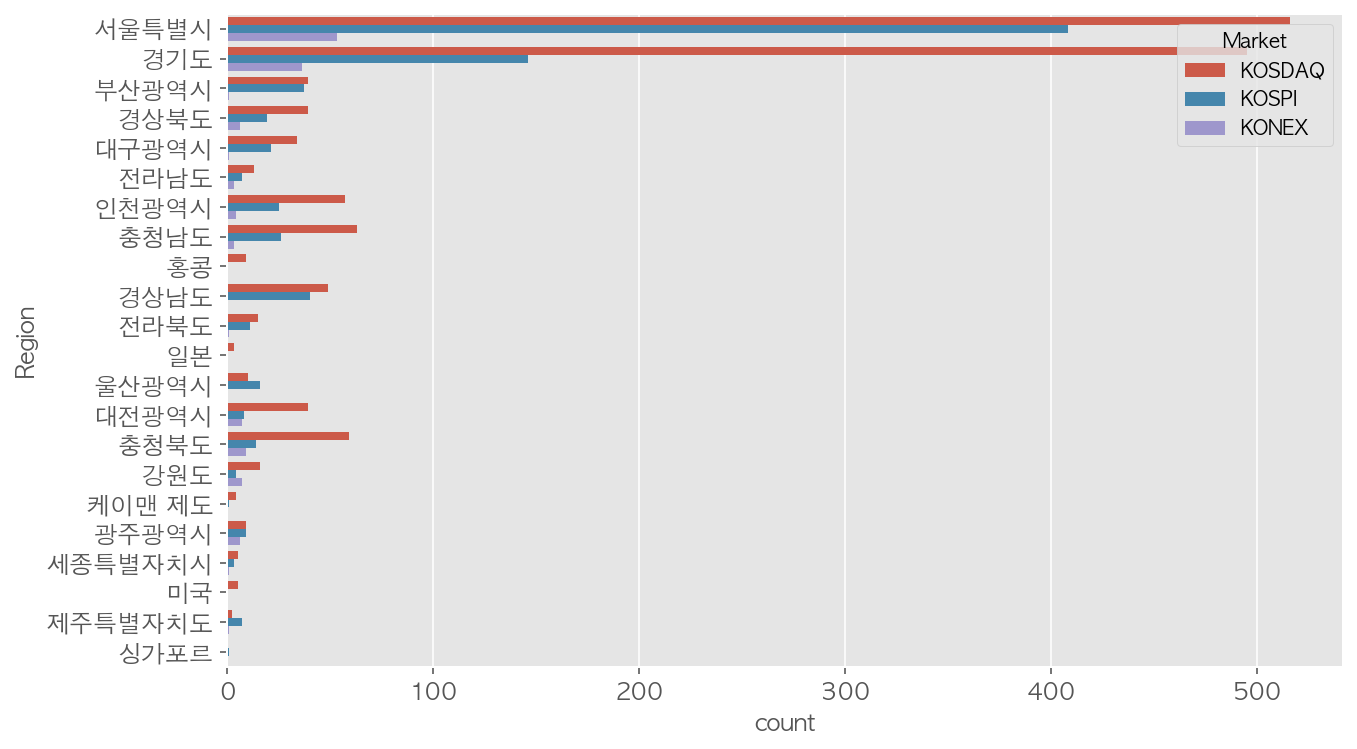

In [106]:
# hue 옵션에 카테고리를 지정할 수 있다.
plt.figure(figsize=(10,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.countplot(data=df, y="Region", hue="Market")

* 연도별 종목 상장 빈도수

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

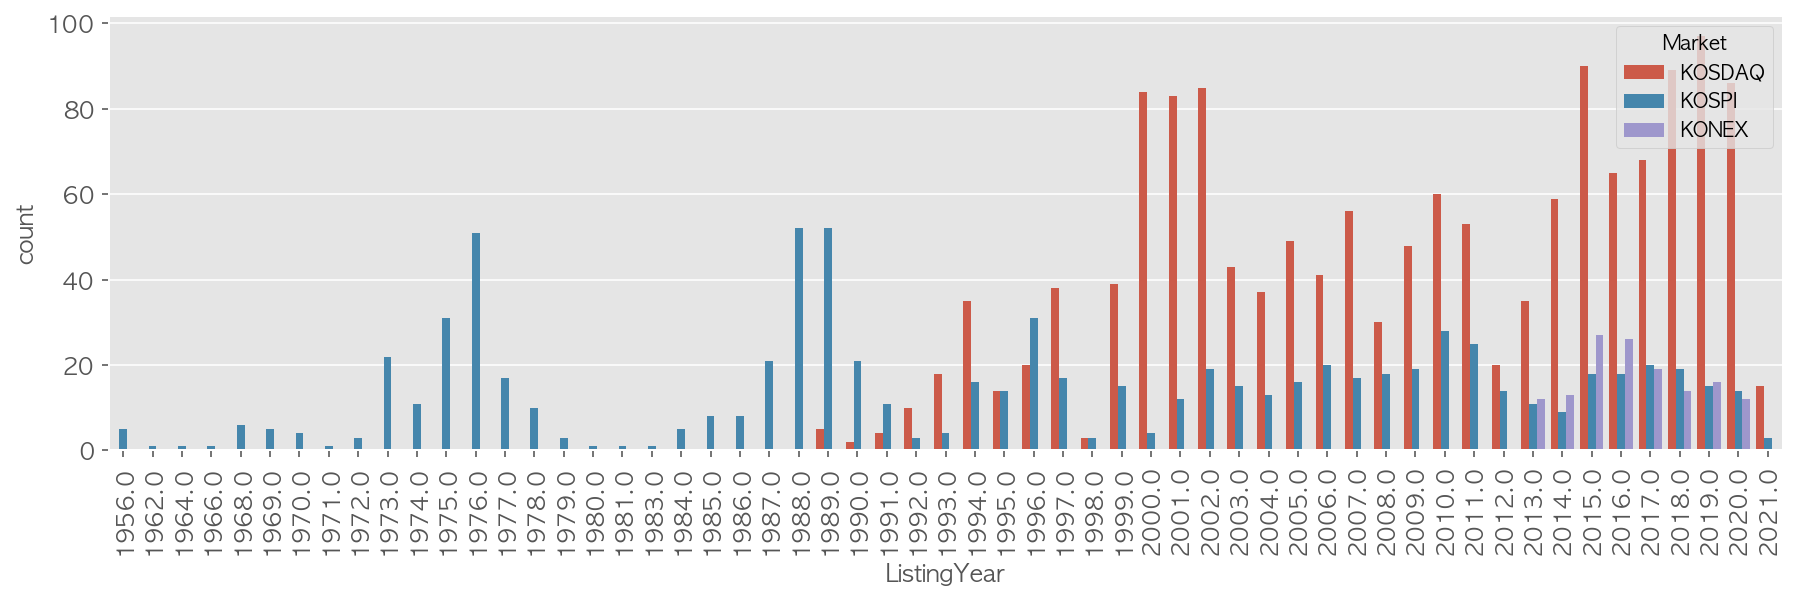

In [107]:
plt.figure(figsize=(15,4))
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
sns.countplot(data=df, x="ListingYear", hue="Market")

### Groupby 와 pivot_table로 빈도수 구하기

* Groupby
 - A groupby operation involves some combination of ***__splitting__*** the object, ***__applying__*** a function, and ***__combining__*** the results. 
 
* pivot_table
 - Create a ***__spreadsheet-style pivot__*** table as a DataFrame. 
 
> Groupby가 연산이 더 빠르고 연산 종류도 더 많다

In [152]:
# Market과 ListingYear로 그룹짓기
# groupby(그루핑).연산()
df1 = df.groupby(["Market", "ListingYear"]).count()
df1

Symbol  Name  Sector  Industry  ListingDate  SettleMonth  \
Market ListingYear                                                             
KONEX  2013.0           12    12      12        12           12           12   
       2014.0           13    13      13        13           13           13   
       2015.0           27    27      27        26           27           27   
       2016.0           26    26      26        25           26           26   
       2017.0           19    19      19        19           19           19   
...                    ...   ...     ...       ...          ...          ...   
KOSPI  2017.0           20    20      20        20           20           20   
       2018.0           19    19      19        19           19           19   
       2019.0           15    15      15        15           15           15   
       2020.0           14    14      14        14           14           14   
       2021.0            3     3       3         3            3            3   

                    Representative  HomePage  Region  
Market ListingYear                                    
KONEX  2013.0                   12        12      12  
       2014.0                   13        13      13  
       2015.0                   27        27      27  
       2016.0                   26        26      26  
       2017.0                   19        18      19  
...                            ...       ...     ...  
KOSPI  2017.0                   20        19      20  
       2018.0                   19        18      19  
       2019.0                   15        14      15  
       2020.0                   14        12      14  
       2021.0                    3         2       3  

[98 rows x 9 columns]

In [153]:
# Groupby의 연산 결과는 multi-index라 사용하기 까다롭다.
    # 따라서 reset_index()로 index level을 없애준다.
# rename()으로 라벨명을 바꿀 수 있다.
df1["Symbol"].reset_index().rename(columns={"Symbol": "Count"})

,Market,ListingYear,Count
0,KONEX,2013.0,12
1,KONEX,2014.0,13
2,KONEX,2015.0,27
3,KONEX,2016.0,26
4,KONEX,2017.0,19
...,...,...,...
93,KOSPI,2017.0,20
94,KOSPI,2018.0,19
95,KOSPI,2019.0,15
96,KOSPI,2020.0,14


In [154]:
# pivot_table로 같은 결과 만들기
    # index - 행에 (값들이) 나열될 것
    # columns - 열에 (값들이) 나열될 것
    # value - 연산에 사용할 값
    # aggfunc - 연산명
df2 = pd.pivot_table(data=df, index=['Market', 'ListingYear'], values='Symbol', aggfunc='count')
df2

Symbol
Market ListingYear        
KONEX  2013.0           12
       2014.0           13
       2015.0           27
       2016.0           26
       2017.0           19
...                    ...
KOSPI  2017.0           20
       2018.0           19
       2019.0           15
       2020.0           14
       2021.0            3

[98 rows x 1 columns]

In [155]:
# 역시나 multi-level이기 때문에 reset_index() 해준다.
df2.reset_index().rename(columns={"Symbol": "Count"})

,Market,ListingYear,Count
0,KONEX,2013.0,12
1,KONEX,2014.0,13
2,KONEX,2015.0,27
3,KONEX,2016.0,26
4,KONEX,2017.0,19
...,...,...,...
93,KOSPI,2017.0,20
94,KOSPI,2018.0,19
95,KOSPI,2019.0,15
96,KOSPI,2020.0,14
